In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

## Touch data

In this notebook we prepare a csv that contains for each key on the keyboard the associated offset when tapped by a user.

In [2]:
data = pd.read_csv('./data/exported_touch_events.csv')
data.head()

,type,user_uuid,hand_posture,x_norm,y_norm,code2,key_cx,key_cy,offset_x,offset_y
0,TOUCH_UP,24001a0b-6fcd-4de6-8502-354f7a627116,unknown,0.588889,0.864865,space,0.55,0.865356,0.038889,-0.000491
1,TOUCH_UP,24001a0b-6fcd-4de6-8502-354f7a627116,unknown,0.483333,0.939940,space,0.55,0.865356,-0.066667,0.074584
2,TOUCH_UP,24001a0b-6fcd-4de6-8502-354f7a627116,unknown,0.505556,0.903904,space,0.55,0.865356,-0.044444,0.038548
3,TOUCH_UP,24001a0b-6fcd-4de6-8502-354f7a627116,unknown,0.448148,0.129129,t,0.45,0.116490,-0.001852,0.012639
4,TOUCH_UP,24001a0b-6fcd-4de6-8502-354f7a627116,unknown,0.325926,0.084084,r,0.35,0.116490,-0.024074,-0.032406


In [3]:
data_right_thumb = data[(data['hand_posture'] == 'right_thumb') ].copy()
data_two_thumb = data[(data['hand_posture'] == 'two_thumb') ].copy()

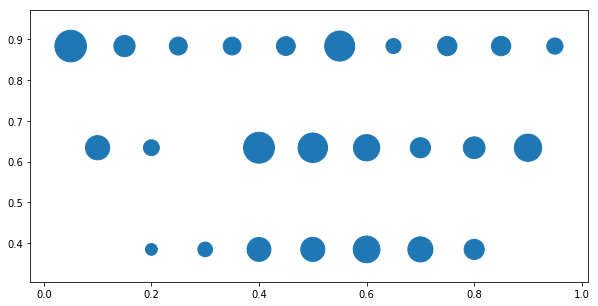

In [4]:
data_right_thumb['offset'] = np.sqrt(
    data_right_thumb.offset_x.apply(np.square) + data_right_thumb.offset_y.apply(np.square)
)
data1 = data_right_thumb.loc[data_right_thumb.code2 != 'space'].dropna(subset=['key_cy','key_cx']).copy()
data1 = data1.loc[(data1.code2.str.len() == 1) & (data1.code2.str.contains('[a-z]'))]
data1['x_mid'] = data1.key_cx
data1['y_mid'] = data1.key_cy


data1 = data1.groupby(['code2','x_mid','y_mid']).offset.median().reset_index()

f, ax = plt.subplots(figsize=(10,5))
data1 = data1.loc[data1.offset < 0.06]
scaler = MinMaxScaler()
data1['offset_scaled'] = scaler.fit_transform(data1[['offset']])[:,0]
ax.scatter(
    data1.x_mid,
    1- data1.y_mid,
    s = data1.offset_scaled * 1000,
    cmap = 'Reds'
)

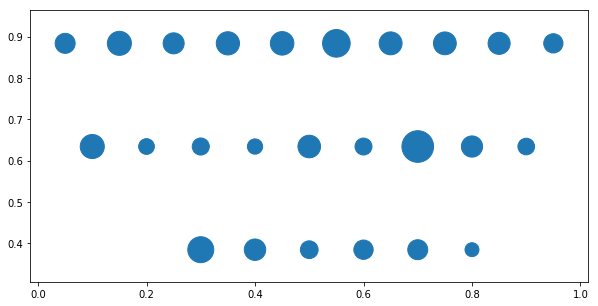

In [5]:
data_two_thumb['offset'] = np.sqrt(
    data_two_thumb.offset_x.apply(np.square) + data_two_thumb.offset_y.apply(np.square)
)
data2 = data_two_thumb.loc[data_two_thumb.code2 != 'space'].dropna(subset=['key_cy','key_cx']).copy()
data2 = data2.loc[(data.code2.str.len() == 1) & (data.code2.str.contains('[a-z]'))].copy()
data2['x_mid'] = data2.key_cx
data2['y_mid'] = data2.key_cy


data2 = data2.groupby(['code2','x_mid','y_mid']).offset.median().reset_index()

f, ax = plt.subplots(figsize=(10,5))
data2 = data2.loc[data2.offset < 0.06]
scaler = MinMaxScaler()
data2['offset_scaled'] = scaler.fit_transform(data2[['offset']])[:,0]
ax.scatter(
    data2.x_mid,
    1- data2.y_mid,
    s = data2.offset_scaled * 1000,
    cmap = 'Reds'
)

In [6]:
df = pd.DataFrame(index=data1.code2)
df['offset_one_thumb'] = data1.set_index('code2').offset_scaled
df['offset_two_thumb'] = data2.set_index('code2').offset_scaled

In [7]:
df.to_csv('../typing_automation/data/key_offset.csv')